In [28]:
import pymc as pm

p = pm.Uniform("p", lower=0, upper=1)

p_true = 0.05
N = 1500

occurrences = pm.rbernoulli(p_true, N)

print(occurrences)
print(occurrences.sum())

[False False False ..., False False False]
64


In [29]:
print("What is the observed frequency in Group A? ", occurrences.mean())
print("Does the observed frequency equal the true frequency?", (occurrences.mean()) == p_true)

What is the observed frequency in Group A?  0.0426666666667
Does the observed frequency equal the true frequency? False


In [30]:
obs = pm.Bernoulli("obs", p, value=occurrences, observed=True)

mcmc = pm.MCMC([p, obs])
mcmc.sample(20000, 1000)

 [-----------------100%-----------------] 20000 of 20000 complete in 1.6 sec

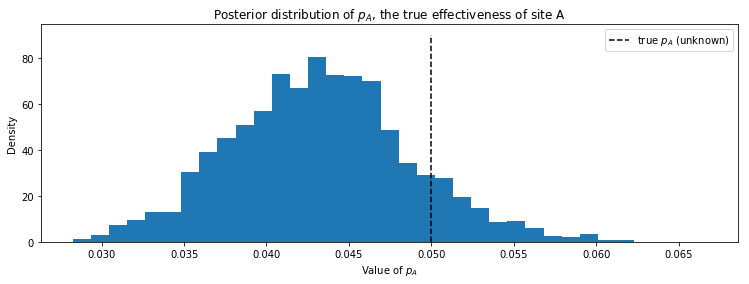

In [31]:
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np


figsize(12.5, 4)

plt.vlines(p_true, 0, 90, linestyle="--", label="true $p_A$ (unknown)")
plt.hist(mcmc.trace("p")[:], bins=35, histtype="stepfilled", normed=True)

plt.title("Posterior distribution of $p_A$, the true effectiveness of site A")
plt.xlabel("Value of $p_A$")
plt.ylabel("Density")
plt.legend()